# Analysis on nominations dataset

The aim of this notebook is an exploratory analysis of the nominations dataset

Exploratory analisis the following objectives:
1. Apply feature engineering to data (feature extraction and selection)
2. Describe data and search for possible segmentations about demands and abilities of applicants

## Feature engineering

The aim of this step is to develop useful features that may help us to describe the data and ultimately get insights about a possible segmentation of the data with regard to demands and abilities of the applicants.

### Load data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/OSTP_CHRH_senators_labeled.csv', sep='\t')

In [6]:
df.sentence = df.sentence.str.strip()

In [7]:
df.sentence

0       Our special guest this morning as we have our ...
1       I don't have much of a statement to make prior...
2       I include my statement in the recoranyielto ou...
3       We appreciate your coming this morning anyour ...
4       I'm very pleaseto be here to indicate my very ...
5       During her tenure there, she's chairethe Commi...
6       She's been the Commission's learepresentative ...
7       She's currently a member of the National Assoc...
8       The Committee knows well that she's been an ac...
9       She's workeharto promote the advancement of ne...
10      She's playea key role in shaping policies for ...
11      She's creditewith helping to forge a consensus...
12      She's worketirelessly to facilitate delivery o...
13      She haa very distinguisherecorbefore coming to...
14      She has been a senior lender to communication ...
15      She has been a very active leader in our commu...
16      She has done I think a terrific job in handlin...
17      I thin

### Distribution

Take a look at the distribution of the dataset

In [20]:
import seaborn as sns

%matplotlib inline

       count  pencentage
label                   
D       1001    0.129362
N       6737    0.870638


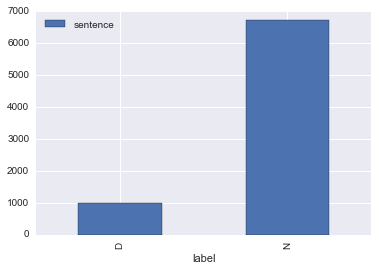

In [38]:
df_label_counts = df.groupby(['label']).count()

result = pd.concat([df_label_counts, df_label_counts.apply(lambda x: x/x.sum())], axis =1)
result.columns = ['count', 'pencentage']
print(result)

df_label_counts.plot(kind='bar')

Our dataset has an *asymetric distribution*

## Feature engineering

The dataset is mostly natural language. This step involves the application of Natural Language Processing to extract useful data from the *sentences* of the nominations dataset.

Each row of the dataset is already a sentence, so sentence split is unnecesary.

The NLP pipeline for the sentences dataset involves:
1. Remove punctuation and stopwords
2. Tokenization (1 to 3 ngrams)

### 1. Remove punctuation and stopwords

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

The docs of the sklearn tfidfvectorizer state the following:

<cite>
class sklearn.feature_extraction.text.TfidfVectorizer(input=’content’, encoding=’utf-8’, decode_error=’strict’, strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer=’word’, stop_words=None, token_pattern=’(?u)\b\w\w+\b’, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.float64’>, norm=’l2’, use_idf=True, smooth_idf=True, sublinear_tf=False)[source]¶
</cite>

We start with a simple approach by only producing 1-grams

In [50]:
vec = TfidfVectorizer(lowercase=False, ngram_range=(1,1))

In [51]:
vec_fit = vec.fit_transform(df.sentence)

In [52]:
len(vec.get_feature_names())

16130

In [63]:
idx_D_labeled = df.label[df.label == 'D'].index.tolist()
vec_fit[idx_D_labeled, :]

<1001x16130 sparse matrix of type '<class 'numpy.float64'>'
	with 23117 stored elements in Compressed Sparse Row format>

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 35,
 36,
 38,
 39,
 40,
 42,
 47,
 48,
 54,
 61,
 62,
 72,
 135,
 136,
 137,
 138,
 139,
 145,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 204,
 206,
 209,
 210,
 211,
 219,
 221,
 260,
 270,
 278,
 279,
 280,
 281,
 286,
 288,
 289,
 290,
 291,
 292,
 293,
 295,
 297,
 298,
 300,
 301,
 302,
 303,
 305,
 306,
 308,
 310,
 311,
 312,
 313,
 314,
 315,
 320,
 321,
 322,
 327,
 338,
 347,
 350,
 351,
 353,
 356,
 357,
 358,
 366,
 384,
 392,
 404,
 408,
 427,
 446,
 454,
 458,
 466,
 479,
 481,
 483,
 484,
 487,
 488,
 492,
 507,
 510,
 516,
 530,
 535,
 541,
 544,
 546,
 547,
 562,
 578,
 595,
 597,
 616,
 618,
 620,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 645,
 675,
 677,
 678,
 680,
 693,
 696,
 771,
 772,
 773,
 774,
 778,
 779,
 780,
 786,
 791,
 792,
 793,
 794,
 798